In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import LinRegAC.utilsAC as utilsAC
import LinRegAC.linRegAC as linRegAC
import LinRegAC.crossValdAC as crossValdAC

In [2]:
CH_dataCols = ['vendor_name', 'model_name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']
CHdata = pd.read_csv('computer_hardware/machine.data', names=CH_dataCols)
CHdata

,vendor_name,model_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [3]:
CHdata_x = CHdata[CHdata.columns[2:-2]]
CHdata_y = CHdata[CHdata.columns[-2]]

In [4]:
train_x, train_y, test_x, test_y = utilsAC.splitTrainTest(CHdata_x, CHdata_y, 0.8)

In [5]:
train_x, train_min, train_max = utilsAC.normMinMax(train_x, mode='train')
test_x = utilsAC.normMinMax(test_x, mode='test', train_min=train_min, train_max=train_max)

In [6]:
linReg1 = linRegAC.LinReg(mode=1)
linReg1.fit(train_x, train_y)
pred1 = linReg1.predict(test_x)
print(f'MSE: {utilsAC.getMse(test_y, pred1)}, RMSE: {utilsAC.getRmse(test_y, pred1)}')

Fitting completed.
Mode = 1, using Normal equation w = (X^T X)^-1 X^T y

MSE: 3818.8799172151707, RMSE: 61.79708664019017


In [7]:
lrs = [0.01, 0.005, 0.003, 0.001]
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'violet', 'purple']

In [8]:
hld_cv = crossValdAC.CrossVald(option='holdout')
gd_hld_train_costs, gd_hld_opt_model = hld_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5)

Implementing Holdout Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 62.9171
Iteration  200 | Loss = 62.1598
Iteration  300 | Loss = 61.9786
Iteration  400 | Loss = 61.9248
Iteration  500 | Loss = 61.9085
Iteration  600 | Loss = 61.9035
Iteration  700 | Loss = 61.9020
Iteration  800 | Loss = 61.9016
Iteration  900 | Loss = 61.9014
Iteration 1000 | Loss = 61.9014
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 3027.1185526901127, RMSE: 55.01925619899012
----------------- lr : 0.005 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 60.6518
Iteration  200 | Loss = 59.1541
Iteration  300 | Loss = 58.9657
Iteration  400 | Loss = 58.9382
Iteration  500 | Loss = 58.9332
Iteration  600 | Loss = 58.9320
Iteration  700 | Loss = 58.9317
Iteration  800 | Loss = 58.9315
Iteration  900 | Loss = 58.9315
Iteration 1000 | Loss = 58.9315
Fitting

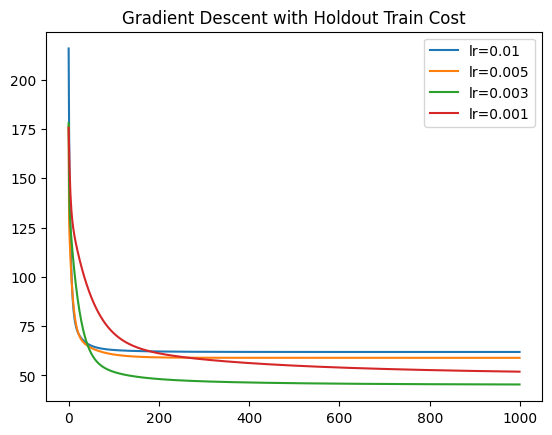

In [9]:
for i in range(len(gd_hld_train_costs)):
    plt.plot(gd_hld_train_costs[i], label=f'lr={lrs[i]}')
plt.legend()
plt.title('Gradient Descent with Holdout Train Cost')
plt.show()

In [10]:
print(gd_hld_opt_model)

{'rmse': 55.01925619899012, 'lr': 0.01, 'w': array([-62.10577674,  89.44412741, 501.99956722, 405.13230555,
        99.01430155, -29.73439424, 288.58093889])}


In [11]:
sgd_hld_train_costs, sgd_hld_opt_model = hld_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5, stochGD=True)

Implementing Holdout Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 64.5347
Iteration  200 | Loss = 63.5620
Iteration  300 | Loss = 63.2744
Iteration  400 | Loss = 63.1736
Iteration  500 | Loss = 63.1351
Iteration  600 | Loss = 63.1193
Iteration  700 | Loss = 63.1124
Iteration  800 | Loss = 63.1091
Iteration  900 | Loss = 63.1074
Iteration 1000 | Loss = 63.1065
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 3202.5162589802426, RMSE: 56.59077892183711
----------------- lr : 0.005 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 61.8692
Iteration  200 | Loss = 60.1570
Iteration  300 | Loss = 59.6544
Iteration  400 | Loss = 59.3997
Iteration  500 | Loss = 59.2482
Iteration  600 | Loss = 59.1539
Iteration  700 | Loss = 59.0940
Iteration  800 | Loss = 59.0555
Iteration  900 | Loss = 59.0306
Iteration 1000 | Loss = 59.01

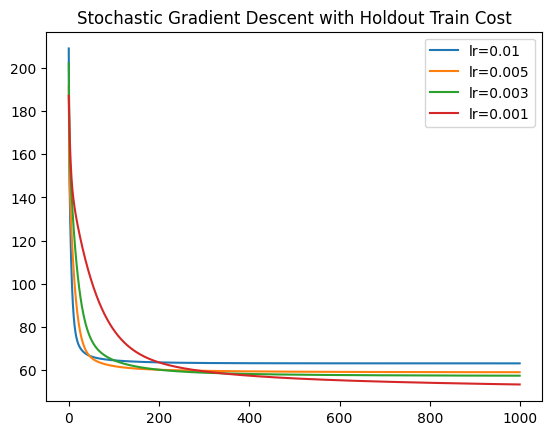

In [12]:
for i in range(len(sgd_hld_train_costs)):
    plt.plot(sgd_hld_train_costs[i], label=f'lr={lrs[i]}')
plt.legend()
plt.title('Stochastic Gradient Descent with Holdout Train Cost')
plt.show()

In [13]:
print(sgd_hld_opt_model)

{'rmse': 56.59077892183711, 'lr': 0.01, 'w': array([-60.83765161,  84.440855  , 460.47557716, 332.23389025,
       265.63247948, -60.71273254, 325.7192086 ])}


In [14]:
montc_cv = crossValdAC.CrossVald(option='monte_carlo', monte_carlo=5)
gd_montc_train_costs, gd_montc_opt_model = montc_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5)

Implementing Monte Carlo Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 61.1749
Iteration  200 | Loss = 60.0838
Iteration  300 | Loss = 59.8187
Iteration  400 | Loss = 59.7449
Iteration  500 | Loss = 59.7239
Iteration  600 | Loss = 59.7179
Iteration  700 | Loss = 59.7162
Iteration  800 | Loss = 59.7157
Iteration  900 | Loss = 59.7155
Iteration 1000 | Loss = 59.7155
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 5101.354364474014, RMSE: 71.4237661039658
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 62.1414
Iteration  200 | Loss = 61.7684
Iteration  300 | Loss = 61.7277
Iteration  400 | Loss = 61.7218
Iteration  500 | Loss = 61.7209
Iteration  600 | Loss = 61.7207
Iteration  700 | Loss = 61.7207
Iteration  800 | Loss = 61.7207
Iteration  900 | Loss = 61.7207
Iteration 1000 | Loss = 61.7207
Fittin

In [15]:
print(gd_montc_opt_model)

{'rmse': 59.55388088082608, 'lr': 0.01, 'w': array([-59.62247763,  80.12336683, 480.28431736, 320.55052327,
       316.74051812, -70.55102819, 308.84868922])}


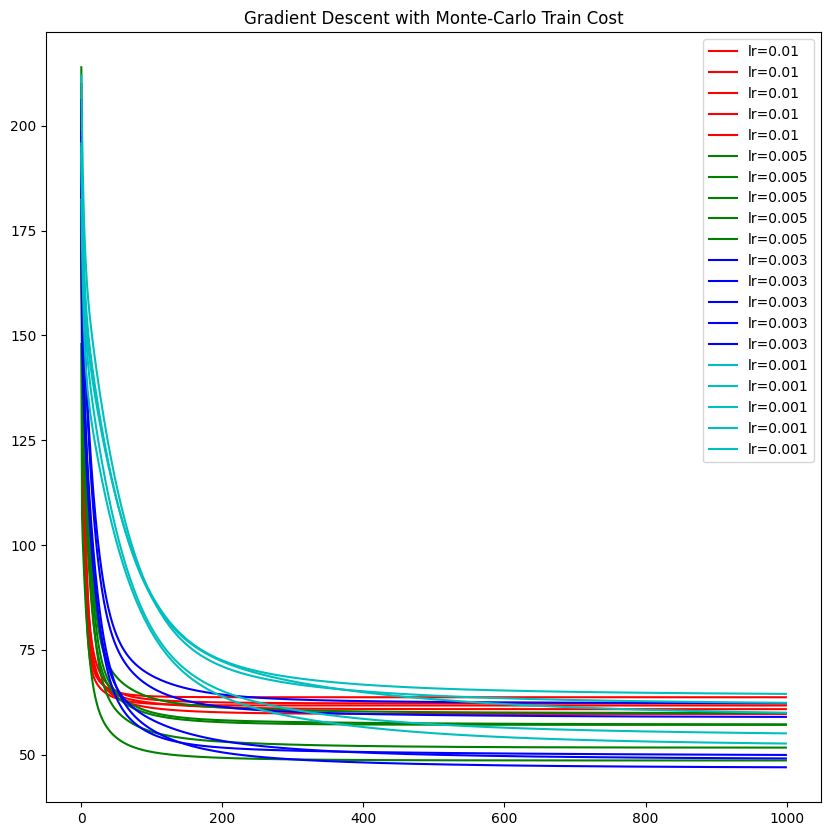

In [16]:
plt.figure(figsize=(10, 10))
for i in range(len(gd_montc_train_costs)):
    for j in range(len(gd_montc_train_costs[i])):
        plt.plot(gd_montc_train_costs[i][j], label=f'lr={lrs[i]}', color=colors[i])
plt.legend()
plt.title('Gradient Descent with Monte-Carlo Train Cost')
plt.show()

In [17]:
sgd_montc_train_costs, sgd_montc_opt_model = montc_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5, stochGD=True)

Implementing Monte Carlo Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 49.7000
Iteration  200 | Loss = 48.2491
Iteration  300 | Loss = 47.8587
Iteration  400 | Loss = 47.7317
Iteration  500 | Loss = 47.6910
Iteration  600 | Loss = 47.6786
Iteration  700 | Loss = 47.6753
Iteration  800 | Loss = 47.6746
Iteration  900 | Loss = 47.6746
Iteration 1000 | Loss = 47.6748
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 6964.102354937806, RMSE: 83.45119744460115
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 48.9763
Iteration  200 | Loss = 47.7964
Iteration  300 | Loss = 47.4965
Iteration  400 | Loss = 47.4057
Iteration  500 | Loss = 47.3808
Iteration  600 | Loss = 47.3760
Iteration  700 | Loss = 47.3767
Iteration  800 | Loss = 47.3784
Iteration  900 | Loss = 47.3798
Iteration 1000 | Loss = 47.

In [18]:
print(sgd_montc_opt_model)

{'rmse': 66.12972361364717, 'lr': 0.01, 'w': array([-57.38102259,  67.90061179, 531.14384084, 341.39784285,
       124.91464611, -39.70044705, 373.46105896])}


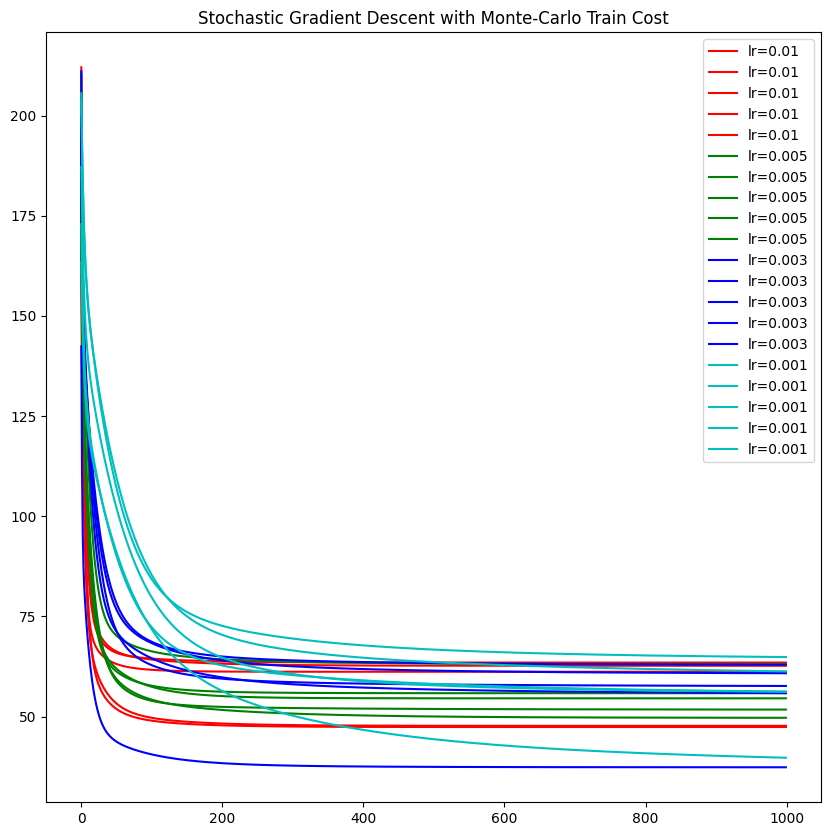

In [19]:
plt.figure(figsize=(10, 10))
for i in range(len(sgd_montc_train_costs)):
    for j in range(len(sgd_montc_train_costs[i])):
        plt.plot(sgd_montc_train_costs[i][j], label=f'lr={lrs[i]}', color=colors[i])
plt.legend()
plt.title('Stochastic Gradient Descent with Monte-Carlo Train Cost')
plt.show()

In [20]:
kfold_cv = crossValdAC.CrossVald(option='k_fold', k_fold=6)
gd_kfold_train_costs, gd_kfold_opt_model = kfold_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5)

Implementing K-Fold Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 61.4337
Iteration  200 | Loss = 60.9624
Iteration  300 | Loss = 60.8773
Iteration  400 | Loss = 60.8566
Iteration  500 | Loss = 60.8512
Iteration  600 | Loss = 60.8497
Iteration  700 | Loss = 60.8494
Iteration  800 | Loss = 60.8493
Iteration  900 | Loss = 60.8492
Iteration 1000 | Loss = 60.8492
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 2552.2614207421566, RMSE: [50.51991113157422]
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 59.8201
Iteration  200 | Loss = 59.0522
Iteration  300 | Loss = 58.8656
Iteration  400 | Loss = 58.8138
Iteration  500 | Loss = 58.7992
Iteration  600 | Loss = 58.7951
Iteration  700 | Loss = 58.7939
Iteration  800 | Loss = 58.7936
Iteration  900 | Loss = 58.7935
Iteration 1000 | Loss = 58.7935
Fitting

In [21]:
print(gd_kfold_opt_model)

{'rmse': 63.68323540828532, 'lr': 0.005, 'w': array([-49.79565555,  65.62143811, 177.34036197, 426.80818783,
       150.05391434, -76.4670558 , 298.09167667])}


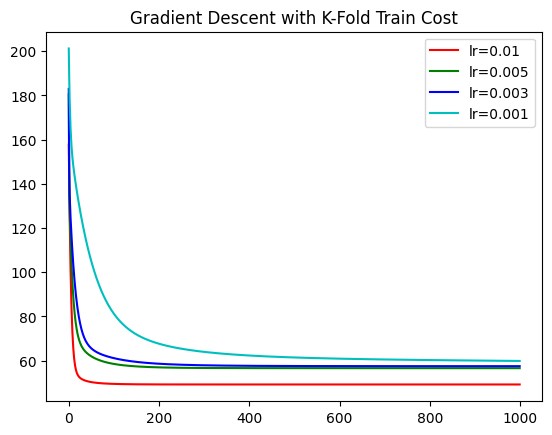

In [22]:
for i in range(len(gd_kfold_train_costs)):
    plt.plot(gd_kfold_train_costs[i], label=f'lr={lrs[i]}', color=colors[i])
plt.legend()
plt.title('Gradient Descent with K-Fold Train Cost')
plt.show()

In [23]:
sgd_kfold_train_costs, sgd_kfold_opt_model = kfold_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5, stochGD=True)

Implementing K-Fold Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 63.1139
Iteration  200 | Loss = 62.6879
Iteration  300 | Loss = 62.5786
Iteration  400 | Loss = 62.5476
Iteration  500 | Loss = 62.5387
Iteration  600 | Loss = 62.5363
Iteration  700 | Loss = 62.5356
Iteration  800 | Loss = 62.5354
Iteration  900 | Loss = 62.5354
Iteration 1000 | Loss = 62.5354
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 1538.372593576757, RMSE: [39.222093181990644]
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 63.4293
Iteration  200 | Loss = 62.9060
Iteration  300 | Loss = 62.7895
Iteration  400 | Loss = 62.7586
Iteration  500 | Loss = 62.7500
Iteration  600 | Loss = 62.7474
Iteration  700 | Loss = 62.7466
Iteration  800 | Loss = 62.7463
Iteration  900 | Loss = 62.7462
Iteration 1000 | Loss = 62.74

In [24]:
print(sgd_kfold_opt_model)

{'rmse': 63.2758733166285, 'lr': 0.005, 'w': array([-38.24153731,  53.02821231, 220.33934978, 305.53810034,
       172.13141301,  37.2675495 , 164.69584535])}


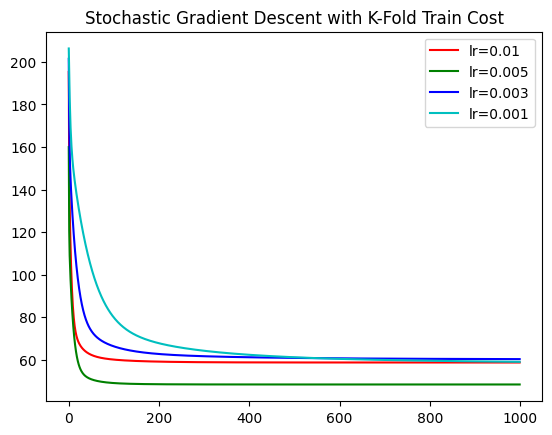

In [25]:
for i in range(len(sgd_kfold_train_costs)):
    plt.plot(sgd_kfold_train_costs[i], label=f'lr={lrs[i]}', color=colors[i])
plt.legend()
plt.title('Stochastic Gradient Descent with K-Fold Train Cost')
plt.show()